## Problem
What happens when you start with a matrix M, and you define M’_{ij} to be the Hadamard product (sum of the element products) of M by a matrix which is mostly 0 except for a 3x3 submatrix of all (1/9) centered around (i,j)? (this is simultaneously done for all i, j. Yikes!) Test your hypothesis by doing it to an image file of your face.

### Setup
Import libraries and load the image.

In [1]:
from PIL import Image
import math
import numpy as np
from matplotlib.pyplot import imshow
%matplotlib inline

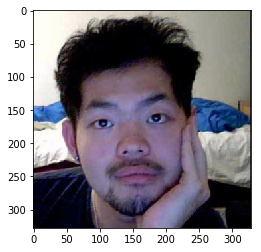

In [2]:
#original = Image.open('../image_tilt/aj_face.jpeg')
original = Image.open('yanxzhang.jpeg')
image_tensor = np.asarray(original)
# print(image_tensor, image_tensor.dtype)
imshow(image_tensor)

We have a 328x328 image with 3 color channels, dtype is unsigned 8 bit integer.

In [3]:
type(image_tensor), image_tensor.shape, image_tensor.dtype

(numpy.ndarray, (328, 328, 3), dtype('uint8'))

In [4]:
w = image_tensor.shape[0]
h = image_tensor.shape[1]
D = image_tensor.shape[2]

In [5]:
# twobytwo = image_tensor[0:2,0:2,0] * 1/4
# print(twobytwo)
# np.sum(twobytwo)

### Create a function to apply the transformation
For each pixel in the image, apply the transformation individually on each rgb layer. Note that values are capped at 255.

In [6]:
def apply_transformation(size):
    """
    Applies a transformation to each pixel by averaging from pixels in its surrounding.
    size: size of the matrix, positive odd integer. if even, will effectively round up to an odd integer
    """
    margin = int(size/2)
    transformed = np.zeros(image_tensor.shape, dtype=np.uint8) # setting dtype=np.uint8 is very important!
    for x in range(w):
        for y in range(h):
            # define the region to sample from
            x_min = x-margin if x-margin >= 0 else 0
            x_max = x+margin+1 if x+margin+1 < w else w
            y_min = y-margin if y-margin >= 0 else 0
            y_max = y+margin+1 if y+margin+1 < h else h
            factor = 1 / ((x_max - x_min) * (y_max-y_min)) # set the factor to properly average based on submatrix width & height
            # apply the transformation per rgb layer
            layers = []
            for z in range(D):
                submatrix = np.sum(image_tensor[x_min:x_max, y_min:y_max, z] * factor)
#                 print(submatrix) DEBUG
                # cap the value at 255
                submatrix = np.clip(submatrix, 0, 255)
                layers.append(submatrix)
            transformed[x_min:x_max, y_min:y_max] = np.asarray(layers) 
    return transformed

In [7]:
# def save_image(image, size, fa3ctor):
#     "Saves an image with the filename transform_sizexsize_1-factor"
#     filename = f'transform_{size}x{size}_1-{1/factor}.jpg'
#     savable = Image.fromarray(image, 'RGB')
#     image.save(savable)

### Try the transformation with different parameters.

A transformation with submatrix size 1 should return back the same image.

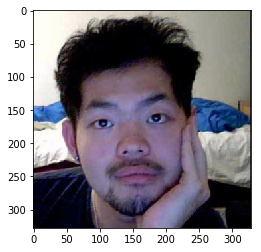

In [8]:
one = apply_transformation(1)
imshow(one)
#save_image(one_third)

Nice. How about for size 3?

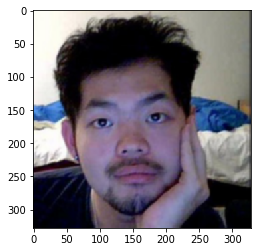

In [9]:
three = apply_transformation(3)
imshow(three)

Hm... not much difference. What if we go bigger?

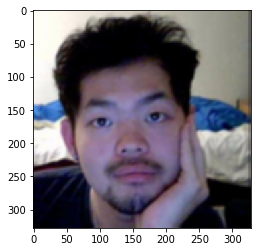

In [10]:
five = apply_transformation(5)
imshow(five)

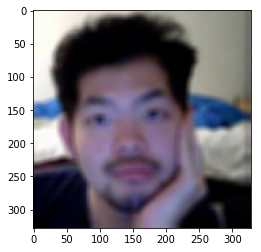

In [11]:
eleven = apply_transformation(11)
imshow(eleven)

We're starting to get some significant results!

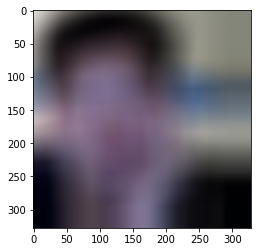

In [12]:
imshow(apply_transformation(65))

Conclusion: The transformation blurs the image. Win!